# 14.3 Cubic Spline Interpolation

TRY IT! Use `scipy.interpolate.CubicSpline` to plot the cubic spline interpolation of the data set $x = [0,1,2]$ and $y = [1,3,2]$ for $0 \le x \le 2$. (See Figure 14.4.)

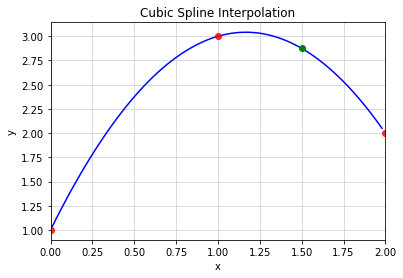

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

# Data
x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

# Calculations
f = CubicSpline([0,1,2], [1,3,2])
xnew = np.arange(0, 2, (2-0)/100)
ynew = f(xnew)

# x = np.insert(x, 3, 1.5)
# y = np.insert(y, 3, f(1.5))

# Plot
plt.plot(xnew, ynew, c='b')
plt.plot(x, y, 'o', alpha=.8, c='r')
plt.plot(1.5, f(1.5),'o', c='g')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,2])
plt.grid(b=True, which='major', color='lightgrey', linestyle='-')

plt.show()
# Figure 14.2 Linear interpolation of the points $x = (0, 1, 2)$ and $y = (1, 3, 2)$.

In [7]:
from scipy.interpolate import CubicSpline

f = CubicSpline([0,1 ,2], [1,3,2])
print(f(1.5))

2.875


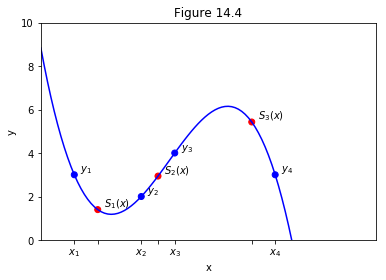

In [58]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
# Create data
N = 4
x = np.array([1,3,4,7], dtype=float)
y = np.array([3,2,4,3], dtype=float)

# Calculations
f = CubicSpline(x, y)
xnew = np.arange(0, 10, (10-0)/100)
ynew = f(xnew)

x_labels = ["$x_" + str(i) + "$" for i in range(1,N+1)]
y_labels = ["$y_" + str(i) + "$" for i in range(1,N+1)]
color = ['b','r','b','r','b','r','b']

to_interp = [1.7, 3.5, 6.3]

x_labels.insert(1, "")
y_labels.insert(1, "$S_1(x)$")
x = np.insert(x, 1, to_interp[0])
y = np.insert(y, 1, f(to_interp[0]))

x_labels.insert(3, "")
y_labels.insert(3, "$S_2(x)$")
x = np.insert(x, 3, to_interp[1])
y = np.insert(y, 3, f(to_interp[1]))

x_labels.insert(5, "")
y_labels.insert(5, "$S_3(x)$")
x = np.insert(x, 5, to_interp[2])
y = np.insert(y, 5, f(to_interp[2]))

# Plot
plt.plot(xnew, ynew, c='b')
plt.scatter(x, y, c=color)
plt.title('Figure 14.4')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,10])
plt.ylim([0,10])
for label, x_i, y_i in zip(y_labels, x, y):
    ax.annotate(label, xy=(x_i,y_i), xytext=(6, 3), textcoords='offset points')
plt.xticks(x, x_labels)

plt.show()

**TRY IT!** Find the cubic spline interpolation at $x = 1.5$ based on the data $x = [0,1,2]$, $y = [1,3,2]$.
First we create the appropriate system of equations and find the coefficients of the cubic splines by solving the system in matrix form.
The matrix form of the system of equations is:

$
  A =
  \left[ {\begin{array}{ccccc}
        0 &  0 &  0 &  1 &  0 &  0 &  0 &  0\\
        0 &  0 &  0 &  0 &  1 &  1 &  1 &  1\\
        1 &  1 &  1 &  1 &  0 &  0 &  0 &  0\\
        0 &  0 &  0 &  0 &  8 &  4 &  2 &  1\\
        3 &  2 &  1 &  0 & -3 & -2 & -1 &  0\\
        6 &  2 &  0 &  0 & -6 & -2 &  0 &  0\\
        0 &  2 &  0 &  0 &  0 &  0 &  0 &  0\\
        0 &  0 &  0 &  0 & 12 &  2 &  0 &  0
  \end{array} } \right]
$

$
  b =
  \left[ {\begin{array}{ccccc}
        1\\
        3\\
        3\\
        2\\
        0\\
        0\\
        0\\
        0
  \end{array} } \right]
$

$\begin{aligned}
Ax&=b \\
x&=A\backslash b
\end{aligned}$

In [31]:
import numpy as np
import numpy.linalg as lin

A = np.array([[ 0, 0, 0, 1, 0, 0, 0, 0],
             [ 0, 0, 0, 0, 1, 1, 1, 1],
             [ 1, 1, 1, 1, 0, 0, 0, 0],
             [ 0, 0, 0, 0, 8, 4, 2, 1],
             [ 3, 2, 1, 0,-3,-2,-1, 0],
             [ 6, 2, 0, 0,-6,-2, 0, 0],
             [ 0, 2, 0, 0, 0, 0, 0, 0],
             [ 0, 0, 0, 0,12, 2, 0, 0]],
             dtype=float)

b = np.array([1, 3, 3, 2, 0, 0, 0, 0], dtype=float)

x, resid, rank, s = np.linalg.lstsq(A, b, rcond=None)
print("x =")
print(np.around(x, decimals=4))

x =
[-0.75  0.    2.75  1.    0.75 -4.5   7.25 -0.5 ]
